In [1]:
import keras 
from keras import layers
from keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from keras.models import Model, Sequential
from keras.datasets import mnist
from keras import backend as K
from keras.preprocessing.image import img_to_array
from keras.applications.vgg19 import VGG19, preprocess_input
from keras.utils import np_utils

import sklearn
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, train_test_split, cross_validate
from sklearn.metrics import confusion_matrix, accuracy_score, auc, roc_auc_score, roc_curve
from sklearn.externals import joblib
from sklearn.preprocessing import LabelEncoder

from random import shuffle

import numpy as np
import pandas as pd
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plt

import os
import cv2

Using TensorFlow backend.
C:\Users\RajKumar\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
#Import the MNIST dataset
(X_train, _), (X_test, _) = mnist.load_data()
X_train = X_train.astype('float32')/255.0
X_test = X_test.astype('float32')/255.0

11493376/11490434 [==============================] - 5s 0us/step


In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test2 = train_test_split(X_train, test_size=0.8, random_state=42)

In [4]:
print("Training data shape: ", X_train.shape)

print("Testing data shape: ", X_test.shape)

Training data shape:  (12000, 28, 28)
Testing data shape:  (10000, 28, 28)


In [5]:
#Shape the data

X_train_MLP = X_train.reshape((X_train.shape[0], -1))
X_test_MLP = X_test.reshape((X_test.shape[0], -1))
print("Training data_MLP shape: ", X_train_MLP.shape)
print("Testing data_MLP shape: ", X_test_MLP.shape)

X_train = X_train[..., np.newaxis]
X_test = X_test[..., np.newaxis]
print("Training data shape: ", X_train.shape)
print("Testing data shape: ", X_test.shape)

Training data_MLP shape:  (12000, 784)
Testing data_MLP shape:  (10000, 784)
Training data shape:  (12000, 28, 28, 1)
Testing data shape:  (10000, 28, 28, 1)


##Hidden layer 1

In [13]:
INPUT_SIZE = 784
HIDDEN_ONE = 256
ENCODING_SIZE = 32

input_MLP = Input(shape=(INPUT_SIZE,))

MLP_encode = Dense(HIDDEN_ONE, activation='relu')(input_MLP)

MLP_encode = Dense(ENCODING_SIZE, activation='relu')(MLP_encode)

MLP_decode = Dense(HIDDEN_ONE, activation='relu')(MLP_encode)
MLP_decode = Dense(INPUT_SIZE, activation='relu')(MLP_decode)
autoencoder_MLP1 = Model(input_MLP, MLP_decode)

In [14]:
autoencoder_MLP1.compile(optimizer='adam',loss='mean_squared_error')

autoencoder_MLP1.fit(X_train_MLP,
                   X_train_MLP,
                   epochs=10,
                   batch_size=64,
                   shuffle=True,
                   validation_split=0.2)

decoded_MLP1 = autoencoder_MLP1.predict(X_test_MLP)

Train on 9600 samples, validate on 2400 samples
Epoch 1/10
9600/9600 [==============================] - 3s 309us/step - loss: 0.0410 - val_loss: 0.0243
Epoch 2/10
9600/9600 [==============================] - 2s 257us/step - loss: 0.0218 - val_loss: 0.0203
Epoch 3/10
9600/9600 [==============================] - 2s 219us/step - loss: 0.0192 - val_loss: 0.0186
Epoch 4/10
9600/9600 [==============================] - 3s 302us/step - loss: 0.0181 - val_loss: 0.0178
Epoch 5/10
9600/9600 [==============================] - 2s 212us/step - loss: 0.0173 - val_loss: 0.0173
Epoch 6/10
9600/9600 [==============================] - 2s 209us/step - loss: 0.0168 - val_loss: 0.0169
Epoch 7/10
9600/9600 [==============================] - 2s 237us/step - loss: 0.0164 - val_loss: 0.0166
Epoch 8/10
9600/9600 [==============================] - 2s 206us/step - loss: 0.0161 - val_loss: 0.0163
Epoch 9/10
9600/9600 [==============================] - 2s 230us/step - loss: 0.0158 - val_loss: 0.0160
Epoch 10/10
9600

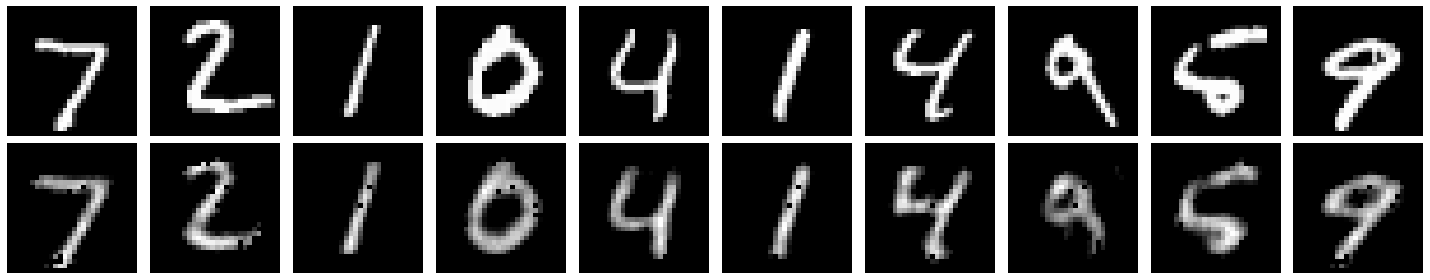

In [15]:
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_test_MLP[i].reshape(28,28))
    plt.gray()
    plt.axis('off')
    
    plt.subplot(2,10,i+1+10)
    plt.imshow(decoded_MLP1[i].reshape(28,28))
    plt.gray()
    plt.axis('off')

plt.tight_layout()
plt.show()

##Hidden layer 2

In [16]:
INPUT_SIZE = 784
HIDDEN_ONE = 256
HIDDEN_TWO = 128
ENCODING_SIZE = 32

input_MLP = Input(shape=(INPUT_SIZE,))
MLP_encode = Dense(HIDDEN_ONE, activation='relu')(input_MLP)
MLP_encode = Dense(HIDDEN_TWO, activation='relu')(MLP_encode)

MLP_encode = Dense(ENCODING_SIZE, activation='relu')(MLP_encode)

MLP_decode = Dense(HIDDEN_TWO, activation='relu')(MLP_encode)
MLP_decode = Dense(HIDDEN_ONE, activation='relu')(MLP_decode)
MLP_decode = Dense(INPUT_SIZE, activation='relu')(MLP_decode)
autoencoder_MLP2 = Model(input_MLP, MLP_decode)

In [17]:
autoencoder_MLP2.compile(optimizer='adam',loss='mean_squared_error')

autoencoder_MLP2.fit(X_train_MLP,
                   X_train_MLP,
                   epochs=10,
                   batch_size=64,
                   shuffle=True,
                   validation_split=0.2)

decoded_MLP2 = autoencoder_MLP2.predict(X_test_MLP)

Train on 9600 samples, validate on 2400 samples
Epoch 1/10
9600/9600 [==============================] - 4s 415us/step - loss: 0.0485 - val_loss: 0.0301
Epoch 2/10
9600/9600 [==============================] - 2s 240us/step - loss: 0.0268 - val_loss: 0.0245
Epoch 3/10
9600/9600 [==============================] - 3s 278us/step - loss: 0.0230 - val_loss: 0.0219
Epoch 4/10
9600/9600 [==============================] - 2s 256us/step - loss: 0.0211 - val_loss: 0.0208
Epoch 5/10
9600/9600 [==============================] - 2s 259us/step - loss: 0.0197 - val_loss: 0.0191
Epoch 6/10
9600/9600 [==============================] - 2s 256us/step - loss: 0.0184 - val_loss: 0.0180
Epoch 7/10
9600/9600 [==============================] - 2s 245us/step - loss: 0.0174 - val_loss: 0.0177
Epoch 8/10
9600/9600 [==============================] - 3s 276us/step - loss: 0.0169 - val_loss: 0.0171
Epoch 9/10
9600/9600 [==============================] - 2s 243us/step - loss: 0.0162 - val_loss: 0.0166
Epoch 10/10
9600

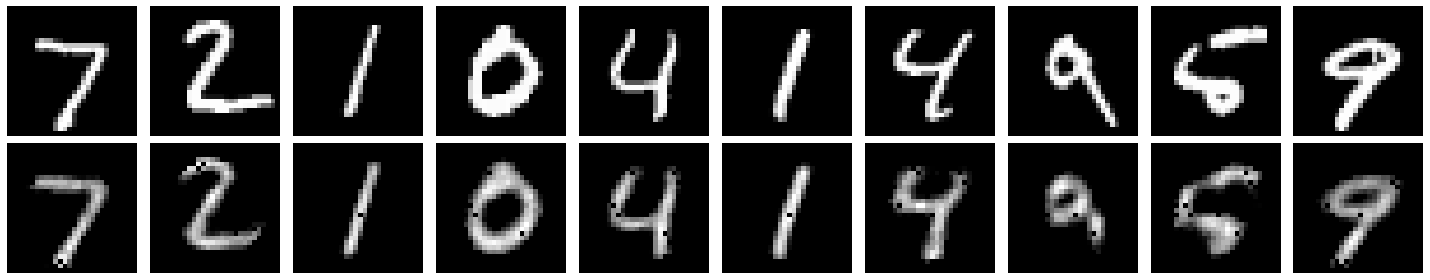

In [18]:
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_test_MLP[i].reshape(28,28))
    plt.gray()
    plt.axis('off')
    
    plt.subplot(2,10,i+1+10)
    plt.imshow(decoded_MLP2[i].reshape(28,28))
    plt.gray()
    plt.axis('off')

plt.tight_layout()
plt.show()

##Hidden layer 3

In [19]:
INPUT_SIZE = 784
HIDDEN_ONE = 256
HIDDEN_TWO = 128
HIDDEN_THREE = 64
ENCODING_SIZE = 32

input_MLP = Input(shape=(INPUT_SIZE,))
MLP_encode = Dense(HIDDEN_ONE, activation='relu')(input_MLP)
MLP_encode = Dense(HIDDEN_TWO, activation='relu')(MLP_encode)
MLP_encode = Dense(HIDDEN_THREE, activation='relu')(MLP_encode)

MLP_encode = Dense(ENCODING_SIZE, activation='relu')(MLP_encode)

MLP_decode = Dense(HIDDEN_THREE, activation='relu')(MLP_encode)
MLP_decode = Dense(HIDDEN_TWO, activation='relu')(MLP_decode)
MLP_decode = Dense(HIDDEN_ONE, activation='relu')(MLP_decode)
MLP_decode = Dense(INPUT_SIZE, activation='relu')(MLP_decode)
autoencoder_MLP3 = Model(input_MLP, MLP_decode)

In [20]:
autoencoder_MLP3.compile(optimizer='adam',loss='mean_squared_error')

autoencoder_MLP3.fit(X_train_MLP,
                   X_train_MLP,
                   epochs=10,
                   batch_size=64,
                   shuffle=True,
                   validation_split=0.2)

decoded_MLP3 = autoencoder_MLP3.predict(X_test_MLP)

Train on 9600 samples, validate on 2400 samples
Epoch 1/10
9600/9600 [==============================] - 4s 457us/step - loss: 0.0549 - val_loss: 0.0362
Epoch 2/10
9600/9600 [==============================] - 3s 262us/step - loss: 0.0322 - val_loss: 0.0291
Epoch 3/10
9600/9600 [==============================] - 3s 319us/step - loss: 0.0271 - val_loss: 0.0251
Epoch 4/10
9600/9600 [==============================] - 3s 261us/step - loss: 0.0238 - val_loss: 0.0227
Epoch 5/10
9600/9600 [==============================] - 3s 306us/step - loss: 0.0215 - val_loss: 0.0210
Epoch 6/10
9600/9600 [==============================] - 3s 266us/step - loss: 0.0199 - val_loss: 0.0198
Epoch 7/10
9600/9600 [==============================] - 3s 286us/step - loss: 0.0190 - val_loss: 0.0188
Epoch 8/10
9600/9600 [==============================] - 2s 253us/step - loss: 0.0182 - val_loss: 0.0186
Epoch 9/10
9600/9600 [==============================] - 3s 287us/step - loss: 0.0173 - val_loss: 0.0175
Epoch 10/10
9600

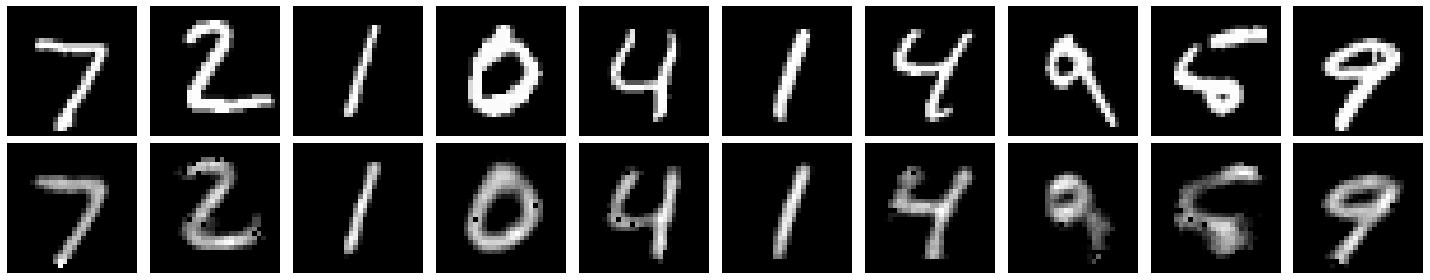

In [21]:
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_test_MLP[i].reshape(28,28))
    plt.gray()
    plt.axis('off')
    
    plt.subplot(2,10,i+1+10)
    plt.imshow(decoded_MLP3[i].reshape(28,28))
    plt.gray()
    plt.axis('off')

plt.tight_layout()
plt.show()

##(d)	Then create a scenario where using two hidden layers the output looks better than using three hidden layers. You can modify the parameters of course – i.e. the numbers for the configuration of the two hidden layers can be very different in the numbers for the configuration of the three hidden layers.

In [22]:
INPUT_SIZE = 784
HIDDEN_ONE = 512
HIDDEN_TWO = 256
ENCODING_SIZE = 32

input_MLP = Input(shape=(INPUT_SIZE,))
MLP_encode = Dense(HIDDEN_ONE, activation='relu')(input_MLP)
MLP_encode = Dense(HIDDEN_TWO, activation='relu')(MLP_encode)


MLP_encode = Dense(ENCODING_SIZE, activation='relu')(MLP_encode)

MLP_decode = Dense(HIDDEN_TWO, activation='relu')(MLP_encode)
MLP_decode = Dense(HIDDEN_ONE, activation='relu')(MLP_decode)
MLP_decode = Dense(INPUT_SIZE, activation='relu')(MLP_decode)
autoencoder_MLP_2 = Model(input_MLP, MLP_decode)

In [23]:
autoencoder_MLP_2.compile(optimizer='adam',loss='mean_squared_error')

autoencoder_MLP_2.fit(X_train_MLP,
                   X_train_MLP,
                   epochs=15,
                   batch_size=64,
                   shuffle=True,
                   validation_split=0.2)

decoded_MLP_2 = autoencoder_MLP_2.predict(X_test_MLP)

Train on 9600 samples, validate on 2400 samples
Epoch 1/15
9600/9600 [==============================] - 8s 857us/step - loss: 0.0418 - val_loss: 0.0250
Epoch 2/15
9600/9600 [==============================] - 6s 666us/step - loss: 0.0220 - val_loss: 0.0200
Epoch 3/15
9600/9600 [==============================] - 6s 651us/step - loss: 0.0183 - val_loss: 0.0177
Epoch 4/15
9600/9600 [==============================] - 8s 808us/step - loss: 0.0164 - val_loss: 0.0163
Epoch 5/15
9600/9600 [==============================] - 7s 704us/step - loss: 0.0152 - val_loss: 0.0153
Epoch 6/15
9600/9600 [==============================] - 7s 698us/step - loss: 0.0144 - val_loss: 0.0150
Epoch 7/15
9600/9600 [==============================] - 6s 597us/step - loss: 0.0139 - val_loss: 0.0144
Epoch 8/15
9600/9600 [==============================] - 6s 648us/step - loss: 0.0132 - val_loss: 0.0138
Epoch 9/15
9600/9600 [==============================] - 6s 665us/step - loss: 0.0126 - val_loss: 0.0136
Epoch 10/15
9600

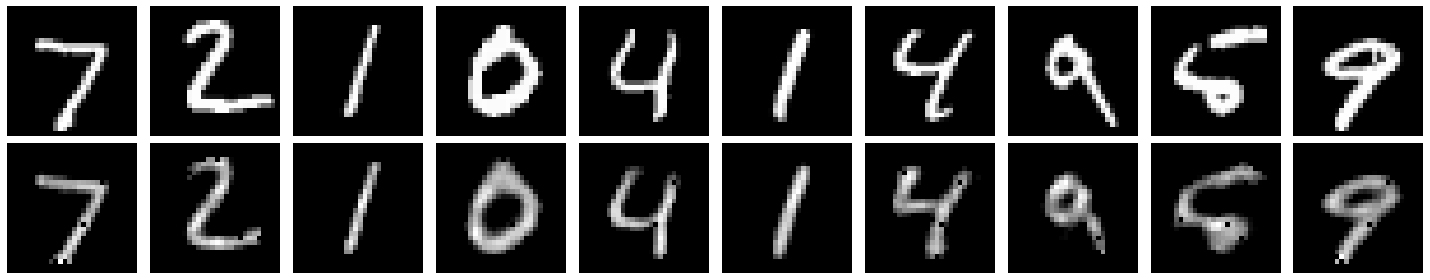

In [24]:
plt.figure(figsize=(20,4))
for i in range(10):
    plt.subplot(2,10,i+1)
    plt.imshow(X_test_MLP[i].reshape(28,28))
    plt.gray()
    plt.axis('off')
    
    plt.subplot(2,10,i+1+10)
    plt.imshow(decoded_MLP_2[i].reshape(28,28))
    plt.gray()
    plt.axis('off')

plt.tight_layout()
plt.show()

Hidden layer one is increased from 256 to 512 and Hidden layer two is increased from 128 to 256 and Number of epochs increased to 15
Image got cleaned better than the previous model.

2. Again using the MNIST dataset with any number of points in the training set that you want, but with the same test set of 10,000 points, build any two CNN architectures (i.e. based on modifying the number of layers or the kinds of layers) and compare their outputs based on test accuracy and test loss metrics (no plots needed). Only keep the code that is needed (you will find the MNIST.ipynb notebook useful for this). Please document your code.

In [25]:
from __future__ import print_function
from matplotlib import pyplot as plt
import keras
from sklearn.metrics import confusion_matrix
from keras import backend as K
from keras.datasets import mnist
from keras.models import Sequential,model_from_json
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.optimizers import RMSprop

CNN Architecture 1

In [31]:
batch_size = 128
num_classes = 10
epochs = 3

# input image dimensions
img_rows, img_cols = 28, 28

In [32]:
# the data, split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, ignore, y_train, ignore2 = train_test_split(x_train, y_train, test_size=0.8, random_state=42)

In [33]:
print(x_train.shape)

(12000, 28, 28)


In [34]:
if K.image_data_format() == 'channels_first':
    x_train = x_train.reshape(x_train.shape[0], 1, img_rows, img_cols)
    x_test = x_test.reshape(x_test.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    x_train = x_train.reshape(x_train.shape[0], img_rows, img_cols, 1)
    x_test = x_test.reshape(x_test.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

# convert class vectors to binary class matrices
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

x_train shape: (12000, 28, 28, 1)
12000 train samples
10000 test samples


In [35]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3),
                 activation='relu',
                 input_shape=input_shape))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes, activation='softmax'))

In [36]:
model.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adadelta(),
              metrics=['accuracy'])

In [37]:
model.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=epochs,
          verbose=1,
          validation_data=(x_test, y_test))

Train on 12000 samples, validate on 10000 samples
Epoch 1/3
12000/12000 [==============================] - 39s 3ms/step - loss: 0.6299 - accuracy: 0.7977 - val_loss: 0.1614 - val_accuracy: 0.9547
Epoch 2/3
12000/12000 [==============================] - 38s 3ms/step - loss: 0.1991 - accuracy: 0.9410 - val_loss: 0.1067 - val_accuracy: 0.9689
Epoch 3/3
12000/12000 [==============================] - 36s 3ms/step - loss: 0.1402 - accuracy: 0.9556 - val_loss: 0.0787 - val_accuracy: 0.9740


In [38]:
from keras import models
#if loaded_model:
#    model = loaded_model
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.07873926379270851
Test accuracy: 0.9739999771118164


CNN Architecture 2

In [45]:
model2 = Sequential()
model2.add(Conv2D(32, kernel_size=(3, 3),
                 activation='tanh',
                 input_shape=input_shape))
model2.add(Conv2D(64, (3, 3), activation='tanh'))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Dropout(0.5))
model2.add(Flatten())
model2.add(Dense(128, activation='tanh'))
model2.add(Dropout(0.5))
model2.add(Dense(num_classes, activation='softmax'))

In [48]:
model2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer="nadam",
              metrics=['accuracy'])
model2.fit(x_train, y_train,
          batch_size=batch_size,
          epochs=5,
          verbose=1,
          validation_data=(x_test, y_test))
score_2 = model2.evaluate(x_test, y_test, verbose=0)

print('Test loss:', score_2[0])
print('Test accuracy:', score_2[1])

Train on 12000 samples, validate on 10000 samples
Epoch 1/5
12000/12000 [==============================] - 41s 3ms/step - loss: 0.0719 - accuracy: 0.9747 - val_loss: 0.0842 - val_accuracy: 0.9740
Epoch 2/5
12000/12000 [==============================] - 41s 3ms/step - loss: 0.0696 - accuracy: 0.9776 - val_loss: 0.0916 - val_accuracy: 0.9737
Epoch 3/5
12000/12000 [==============================] - 39s 3ms/step - loss: 0.0684 - accuracy: 0.9768 - val_loss: 0.0814 - val_accuracy: 0.9759
Epoch 4/5
12000/12000 [==============================] - 39s 3ms/step - loss: 0.0699 - accuracy: 0.9781 - val_loss: 0.0892 - val_accuracy: 0.9729
Epoch 5/5
12000/12000 [==============================] - 39s 3ms/step - loss: 0.0620 - accuracy: 0.9795 - val_loss: 0.0848 - val_accuracy: 0.9755
Test loss: 0.08480998051823117
Test accuracy: 0.9754999876022339


In [ ]:
Changes I have made in CNN Architecture 2 is I have used optimizer= nadam Dropout =.5 epochs = 5. The  test accuracy and test loss is better for CNN Architecture 1 